In [2]:
!pip install xgboost
!pip install catboost
!pip install lightgbm
import xgboost as xgb
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score as RSquared
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor , Pool
import lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
def MSE(target, pred):
  N = len(target)
  return np.sum((target-pred)**2)/N

def RMSE(target, pred):
    return np.sqrt(MSE(target, pred))

def RRMSE(target, pred):
    num = np.sum((target - pred) ** 2)
    dem = np.sum((np.mean(target) - target) ** 2)
    if(dem == 0):
        print(target.shape)
        print(pred.shape)
        print()
    return np.sqrt(num/dem)

In [ ]:
df = pd.read_csv('ICMC_oxides_Abbe.csv')
df=df.drop(['ID'], axis=1)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [ ]:
#CatBoost Regressor (best in this case!)

cbr = CatBoostRegressor(iterations=2000, learning_rate=0.2,
                            depth=7, loss_function='RMSE')


cbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

preds = cbr.predict(test_data.iloc[:, :-1])
y_pred = cbr.predict(test_data.iloc[:, :-1])
cat_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score CATBoost: {cat_rmse}")
print(f'RMSE CATBoost: {RMSE(test_data.iloc[:, -1], preds)}')
print(f'RRMSE CATBoost: {RRMSE(test_data.iloc[:, -1], preds)}')


0:	learn: 12.0534140	total: 72.7ms	remaining: 2m 25s
1:	learn: 10.4707387	total: 85.9ms	remaining: 1m 25s
2:	learn: 9.1641734	total: 99ms	remaining: 1m 5s
3:	learn: 8.1356196	total: 112ms	remaining: 56s
4:	learn: 7.3136454	total: 125ms	remaining: 50s
5:	learn: 6.6942744	total: 138ms	remaining: 45.9s
6:	learn: 6.1744315	total: 152ms	remaining: 43.2s
7:	learn: 5.7604428	total: 165ms	remaining: 41s
8:	learn: 5.4258302	total: 177ms	remaining: 39.2s
9:	learn: 5.1470887	total: 190ms	remaining: 37.8s
10:	learn: 4.9204686	total: 203ms	remaining: 36.7s
11:	learn: 4.7403036	total: 216ms	remaining: 35.8s
12:	learn: 4.5662660	total: 228ms	remaining: 34.9s
13:	learn: 4.3925077	total: 241ms	remaining: 34.2s
14:	learn: 4.2554722	total: 254ms	remaining: 33.6s
15:	learn: 4.1562806	total: 266ms	remaining: 33s
16:	learn: 4.0196726	total: 282ms	remaining: 32.9s
17:	learn: 3.9283258	total: 295ms	remaining: 32.4s
18:	learn: 3.8466317	total: 307ms	remaining: 32s
19:	learn: 3.7775746	total: 319ms	remaining: 3

In [ ]:
train_data.head()

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Lu,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,AbbeNum
11852,0.015294,0.0,0.117947,0.586548,0.000000,0.000000,0.000000,0.028473,0.000000,0.000000,...,0.0,0.0,0.015467,0.000000,0.0,0.0,0.0,0.000000,0.0,41.200001
7513,0.000000,0.0,0.155152,0.613778,0.000000,0.000000,0.000000,0.009307,0.000000,0.000000,...,0.0,0.0,0.026387,0.011238,0.0,0.0,0.0,0.000000,0.0,34.630001
4743,0.026614,0.0,0.022096,0.600334,0.099227,0.000000,0.009353,0.000000,0.135556,0.025891,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.027428,0.0,28.299999
22691,0.000000,0.0,0.334355,0.583961,0.046928,0.000000,0.000000,0.024208,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,62.220001
5317,0.003921,0.0,0.118794,0.615342,0.000000,0.034931,0.005744,0.028304,0.000000,0.000000,...,0.0,0.0,0.001602,0.001132,0.0,0.0,0.0,0.000000,0.0,29.799999


In [ ]:
#XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=3500,
    eta=0.1,
    max_depth=4,
    objective='reg:squarederror'
    )
xgbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = xgbr.predict(test_data.iloc[:, :-1])
xgb_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))
print(f"R2Score XGBoost: {xgb_rmse}")
print('RMSE XGBoost: {}'.format(RMSE(test_data.iloc[:, -1], y_pred)))
print('RRMSE XGBoost: {}'.format(RRMSE(test_data.iloc[:, -1], y_pred)))


R2Score XGBoost: 0.9892407549333883
RMSE XGBoost: 2.0576378230904515
RRMSE XGBoost: 0.1462967148599723


In [ ]:
#LGBM Regressor

lgbmr = lightgbm.LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.1
)
lgbmr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = lgbmr.predict(test_data.iloc[:, :-1])


lgbm_rsquared =  np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))
print("R squared for LightGBM: ", lgbm_rsquared)


print('RMSE: {}'.format(RMSE(test_data.iloc[:, -1], y_pred)))
print('RRMSE: {}'.format(RRMSE(test_data.iloc[:, -1], y_pred)))


R squared for LightGBM:  0.9875485552589118
RMSE: 2.2126010123804325
RRMSE: 0.1573144971260945
MARE: 0.026412672902644152


In [ ]:
#RF regressor (diffrently tuned from the author)

rf = RandomForestRegressor(n_estimators=120)

rf.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = rf.predict(test_data.iloc[:, :-1])

rf_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score RFR: {rf_rmse}")
print('RMSE RFR: {}'.format(RMSE(test_data.iloc[:, -1], preds)))
print('RRMSE RFR: {}'.format(RRMSE(test_data.iloc[:, -1], preds)))

R2Score RFR: 0.9889049182148179
RMSE RFR: 2.089328003568322
RRMSE RFR: 0.14854986614111895


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 32.7 MB/s eta 0:00:00


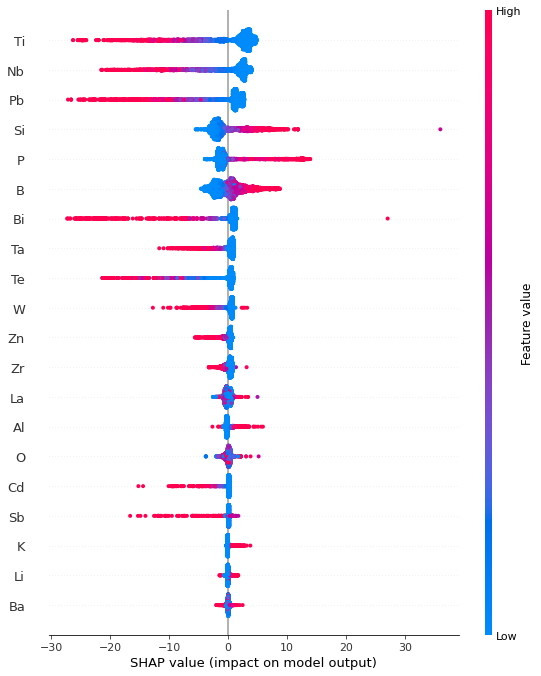

In [ ]:
import shap

shap_values = cbr.get_feature_importance(Pool(test_data.iloc[:,:-1],label = test_data.iloc[:,-1] ), type = "ShapValues")

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.summary_plot(shap_values,test_data.iloc[:,:-1])

In [3]:
df = pd.read_csv('ICMC_oxides_ND300.csv')
df=df.drop(['ID'], axis=1)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [4]:
#XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=3500,
    eta=0.1,
    max_depth=4,
    objective='reg:squarederror'
    )
xgbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = xgbr.predict(test_data.iloc[:, :-1])
xgb_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))
print(f"R2Score XGBoost: {xgb_rmse}")
print('RMSE XGBoost: {}'.format(RMSE(test_data.iloc[:, -1], y_pred)))
print('RRMSE XGBoost: {}'.format(RRMSE(test_data.iloc[:, -1], y_pred)))


R2Score XGBoost: 0.9787546888924754
RMSE XGBoost: 0.03847506871813734
RRMSE XGBoost: 0.20503477502851475


In [4]:
df = pd.read_csv('ICMC_oxides_TEC.csv')
df=df.drop(['ID'], axis=1)
df['TEC_below_Tg']=np.log10(df['TEC_below_Tg'])
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [5]:
#CatBoost Regressor (best in this case!)

cbr = CatBoostRegressor(iterations=2000, learning_rate=0.2,
                            depth=7, loss_function='RMSE')


cbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

preds = cbr.predict(test_data.iloc[:, :-1])
y_pred = cbr.predict(test_data.iloc[:, :-1])
cat_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))

print(f"R2Score CATBoost: {cat_rmse}")
print(f'RMSE CATBoost: {RMSE(test_data.iloc[:, -1], preds)}')
print(f'RRMSE CATBoost: {RRMSE(test_data.iloc[:, -1], preds)}')


0:	learn: 0.1924178	total: 167ms	remaining: 5m 33s
1:	learn: 0.1729969	total: 243ms	remaining: 4m 2s
2:	learn: 0.1575512	total: 361ms	remaining: 4m
3:	learn: 0.1451212	total: 445ms	remaining: 3m 41s
4:	learn: 0.1357924	total: 515ms	remaining: 3m 25s
5:	learn: 0.1283281	total: 647ms	remaining: 3m 35s
6:	learn: 0.1225625	total: 730ms	remaining: 3m 27s
7:	learn: 0.1168622	total: 778ms	remaining: 3m 13s
8:	learn: 0.1125772	total: 859ms	remaining: 3m 10s
9:	learn: 0.1093241	total: 912ms	remaining: 3m 1s
10:	learn: 0.1056162	total: 988ms	remaining: 2m 58s
11:	learn: 0.1029633	total: 1.08s	remaining: 2m 58s
12:	learn: 0.1008063	total: 1.16s	remaining: 2m 57s
13:	learn: 0.0984322	total: 1.28s	remaining: 3m 2s
14:	learn: 0.0967121	total: 1.43s	remaining: 3m 9s
15:	learn: 0.0945397	total: 1.54s	remaining: 3m 10s
16:	learn: 0.0929421	total: 1.61s	remaining: 3m 7s
17:	learn: 0.0915410	total: 1.68s	remaining: 3m 5s
18:	learn: 0.0903575	total: 1.73s	remaining: 3m
19:	learn: 0.0893710	total: 1.81s	re

In [6]:
#XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=3500,
    eta=0.1,
    max_depth=4,
    objective='reg:squarederror'
    )
xgbr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = xgbr.predict(test_data.iloc[:, :-1])
xgb_rmse = np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))
print(f"R2Score XGBoost: {xgb_rmse}")
print('RMSE XGBoost: {}'.format(RMSE(test_data.iloc[:, -1], y_pred)))
print('RRMSE XGBoost: {}'.format(RRMSE(test_data.iloc[:, -1], y_pred)))


R2Score XGBoost: 0.9622591848668991
RMSE XGBoost: 0.05862557592732184
RRMSE XGBoost: 0.2721346378895766


In [7]:
#LGBM Regressor

lgbmr = lightgbm.LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.1
)
lgbmr.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
y_pred = lgbmr.predict(test_data.iloc[:, :-1])


lgbm_rsquared =  np.sqrt(RSquared(test_data.iloc[:, -1], y_pred))
print("R squared for LightGBM: ", lgbm_rsquared)


print('RMSE: {}'.format(RMSE(test_data.iloc[:, -1], y_pred)))
print('RRMSE: {}'.format(RRMSE(test_data.iloc[:, -1], y_pred)))
 

R squared for LightGBM:  0.9646361937777361
RMSE: 0.05678372389943695
RRMSE: 0.26358492683384194
